In [1]:
!pip install opencv-python
import cv2
import numpy as np
import matplotlib.pyplot as plt

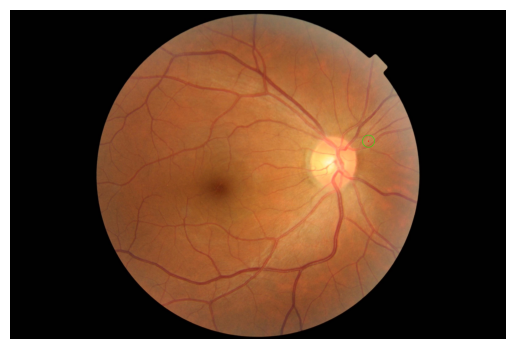

In [23]:
def detect_optic_disc(image_path):
    # Read the image
    img = cv2.imread(image_path)
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Define the ROI coordinates (you'll need to fine-tune these)
    roi_x_start = int(gray.shape[1] * 0.5)  # Start from the middle of the width
    roi_y_start = int(gray.shape[0] * 0.2)  # Start from 20% of the height
    roi_width = int(gray.shape[1] * 0.5)    # Take the right half for the width
    roi_height = int(gray.shape[0] * 0.6)   # Take 60% of the height for ROI

    # Crop the ROI from the grayscale image
    gray_roi = gray[roi_y_start:roi_y_start + roi_height, roi_x_start:roi_x_start + roi_width]

    # Apply Gaussian blur to the ROI
    blurred_roi = cv2.GaussianBlur(gray_roi, (5, 5), 0)

    # Detect circles in the ROI using Hough transform
    circles = cv2.HoughCircles(
        blurred_roi,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=50,  # Minimum distance between detected centers
        param1=20,  # Higher threshold for Canny edge detector
        param2=10,   # Threshold for center detection
        minRadius=20,  # Minimum radius of the optic disc
        maxRadius=40   # Maximum radius of the optic disc
    )

    # Draw the detected circles on the original image
    if circles is not None:
        # Convert the circle parameters a, b, and r to integers
        circles = np.uint16(np.around(circles))

        # Filter out circles on the border (you may need to adjust the thresholds)
        filtered_circles = [c for c in circles[0, :] if c[0] > 10 and c[1] > 10]
        if filtered_circles:
            i = filtered_circles[0]
            # Draw the outer circle
            cv2.circle(img, (i[0] + roi_x_start, i[1] + roi_y_start), i[2], (0, 255, 0), 2)
            # Draw the center of the circle
            cv2.circle(img, (i[0] + roi_x_start, i[1] + roi_y_start), 2, (0, 0, 255), 3)

    # Convert to RGB for displaying with matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img_rgb

# Usage
image_path = '/Users/xlyyy/Desktop/TRAIN000004.JPG'
optic_disc_detected_img = detect_optic_disc(image_path)

# Display the result
plt.imshow(optic_disc_detected_img)
plt.axis('off')  # Hide the axis
plt.show()

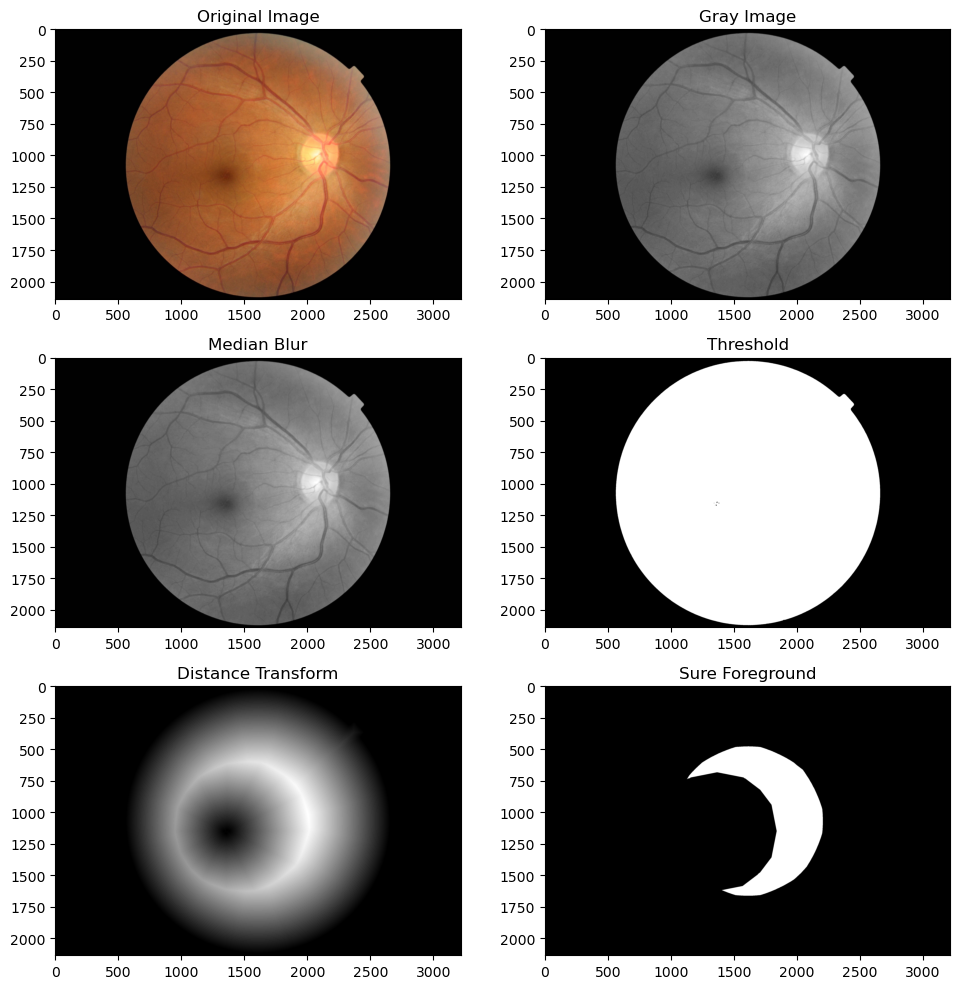

In [7]:
#Threshold Testing

def visualize_steps(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.figure(figsize=(10, 10))

    # Original Image
    plt.subplot(321)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    # Gray Image
    plt.subplot(322)
    plt.imshow(gray, cmap='gray')
    plt.title('Gray Image')

    # Apply a blur
    blurred = cv2.medianBlur(gray, 5)
    plt.subplot(323)
    plt.imshow(blurred, cmap='gray')
    plt.title('Median Blur')

    # Thresholding
    _, thresh = cv2.threshold(blurred, 30, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    plt.subplot(324)
    plt.imshow(thresh, cmap='gray')
    plt.title('Threshold')

    # Distance Transform
    dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
    plt.subplot(325)
    plt.imshow(dist_transform, cmap='gray')
    plt.title('Distance Transform')

    # Sure FG
    plt.subplot(326)
    plt.imshow(sure_fg, cmap='gray')
    plt.title('Sure Foreground')

    plt.tight_layout()
    plt.show()

# Load the image
image_path = '/Users/xlyyy/Desktop/TRAIN000004.JPG'
image = cv2.imread(image_path)
visualize_steps(image)